In [46]:
!pip install pandas numpy scikit-learn matplotlib seaborn

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif, SelectKBest

**Data preprocessing**

In [53]:
#upload file into pandas df
from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [56]:
#read the uploaded file, accessing with the correct key
df = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']))


In [57]:
#display first 5 row data
df.head()


,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [58]:
# Check for missing values
df.isnull().sum()

,0
"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""",0


In [59]:
#drop missing values as appropriate
df.dropna(inplace=True)



In [60]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical variables
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [104]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Replace 'job' with the actual name of your target variable column
target_variable_column = 'job'  # Replace with the correct column name

# Check if the target variable column exists in the DataFrame and apply scaling
if target_variable_column in df.columns:
    df['y_scaled'] = scaler.fit_transform(df[[target_variable_column]])
    df.drop(columns=[target_variable_column], inplace=True)

# Display the DataFrame after scaling
df.head()  # Displays the first 5 rows of the DataFrame


,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_17;""student"";""single"";""basic.9y"";""no"";""yes"";""no"";""cellular"";""aug"";""fri"";182;2;999;2;""failure"";-2.9;92.201;-31.4;0.869;5076.2;""no""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_17;""student"";""single"";""basic.9y"";""no"";""yes"";""no"";""cellular"";""aug"";""fri"";92;3;4;2;""success"";-2.9;92.201;-31.4;0.869;5076.2;""no""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_17;""student"";""single"";""unknown"";""no"";""no"";""yes"";""cellular"";""oct"";""tue"";896;1;2;2;""success"";-3.4;92.431;-26.9;0.742;5017.5;""yes""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_17;""student"";""single"";""unknown"";""no"";""yes"";""no"";""cellular"";""aug"";""wed"";432;3;4;2;""success"";-2.9;92.201;-31.4;0.884;5076.2;""no""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_18;""student"";""single"";""basic.4y"";""no"";""no"";""no"";""cellular"";""apr"";""thu"";108;1;999;0;""nonexistent"";-1.8;93.075;-47.1;1.365;5099.1;""no""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_18;""student"";""single"";""basic.4y"";""no"";""yes"";""no"";""cellular"";""jun"";""tue"";154;1;999;0;""nonexistent"";-1.7;94.055;-39.8;0.737;4991.6;""no""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_18;""student"";""single"";""basic.4y"";""no"";""yes"";""no"";""telephone"";""nov"";""tue"";394;1;13;2;""success"";-1.1;94.767;-50.8;1.049;4963.6;""yes""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_18;""student"";""single"";""basic.4y"";""no"";""yes"";""yes"";""cellular"";""apr"";""thu"";184;2;999;0;""nonexistent"";-1.8;93.075;-47.1;1.365;5099.1;""no""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y""_18;""student"";""single"";""basic.6y"";""no"";""no"";""yes"";""cellular"";""oct"";""fri"";368;2;999;0;""nonexistent"";-3.4;92.431;-26.9;0.72;5017.5;""yes""","age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed""

**Feature Selection**

Columns in the DataFrame: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

Correlation Matrix:
                     age  duration  campaign     pdays  previous  \
age             1.000000 -0.000866  0.004594 -0.034369  0.024365   
duration       -0.000866  1.000000 -0.071699 -0.047577  0.020640   
campaign        0.004594 -0.071699  1.000000  0.052584 -0.079141   
pdays          -0.034369 -0.047577  0.052584  1.000000 -0.587514   
previous        0.024365  0.020640 -0.079141 -0.587514  1.000000   
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004 -0.420489   
cons.price.idx  0.000857  0.005312  0.127836  0.078889 -0.203130   
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342 -0.050936   
euribor3m       0.010767 -0.032897  0.135133  0.296899 -0.454494   
nr.employed    -0.017725 -0.

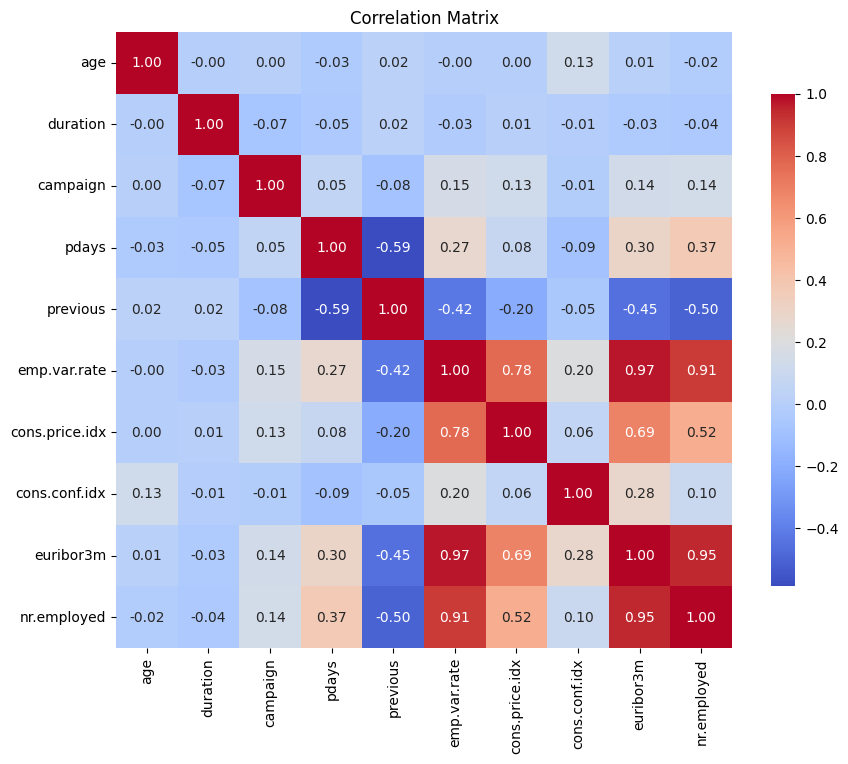

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')

# Display the columns in the DataFrame
print("Columns in the DataFrame:", df.columns.tolist())

# Check if the DataFrame contains numeric columns for correlation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Matrix')
plt.show()

In [11]:

# Calculate mutual information
mutual_info = mutual_info_classif(X.select_dtypes(include=['float64', 'int64']), y)

# Create a DataFrame to display mutual information
mutual_info_df = pd.DataFrame(mutual_info, index=X.select_dtypes(include=['float64', 'int64']).columns, columns=['Mutual Information'])
mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

# Display the mutual information
print("Mutual Information between features and target:")
print(mutual_info_df)

Mutual Information between features and target:
                Mutual Information
duration                  0.076022
euribor3m                 0.073965
cons.price.idx            0.069765
cons.conf.idx             0.068972
nr.employed               0.065763
emp.var.rate              0.055266
pdays                     0.036994
previous                  0.018594
age                       0.013740
campaign                  0.004915


In [15]:
# Select the top 10 features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)  # k=10 for top 10 features
X_kbest = selector.fit_transform(X_scaled, y)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Create a DataFrame to display the selected feature names and their scores
selected_features = X.columns[selected_indices]
selected_scores = selector.scores_[selected_indices]

# Create a DataFrame for better visualization
selected_features_df = pd.DataFrame({
    'Feature': selected_features,
    'ANOVA F-Score': selected_scores
}).sort_values(by='ANOVA F-Score', ascending=False)

# Display the selected features
print("Top 10 Features based on ANOVA F-value:")
print(selected_features_df)

Top 10 Features based on ANOVA F-value:
       Feature  ANOVA F-Score
1          job    8094.101634
9  day_of_week    5926.610646
3    education    4861.173272
8        month    4309.479048
5      housing    4023.829925
4      default    2304.257088
6         loan     778.589786
2      marital     182.156673
7      contact     124.409975
0          age      38.094659


**Model Training**

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate models with cross-validation
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()
print(results)

{'Logistic Regression': 0.9089833080424885, 'Decision Tree': 0.8895295902883158, 'Random Forest': 0.9110773899848255}


**Feature Importance & Impact**

In [20]:
# Create and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a Series for feature importances using only numeric columns
feature_importances = pd.Series(importances, index=numeric_cols).sort_values(ascending=False)

# Display the feature importances
print("Feature Importances:")
print(feature_importances)

Feature Importances:
duration          0.411514
age               0.152906
euribor3m         0.148289
nr.employed       0.088960
campaign          0.057237
pdays             0.047141
cons.conf.idx     0.028480
cons.price.idx    0.025992
previous          0.020016
emp.var.rate      0.019464
dtype: float64


**Evaluation**

In [24]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[6984  319]
 [ 425  510]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7303
           1       0.62      0.55      0.58       935

    accuracy                           0.91      8238
   macro avg       0.78      0.75      0.76      8238
weighted avg       0.91      0.91      0.91      8238

Accuracy: 0.91


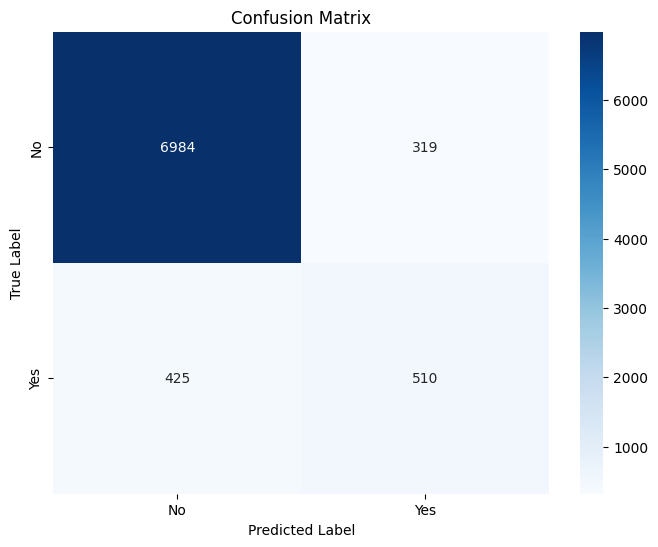

In [27]:
# Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

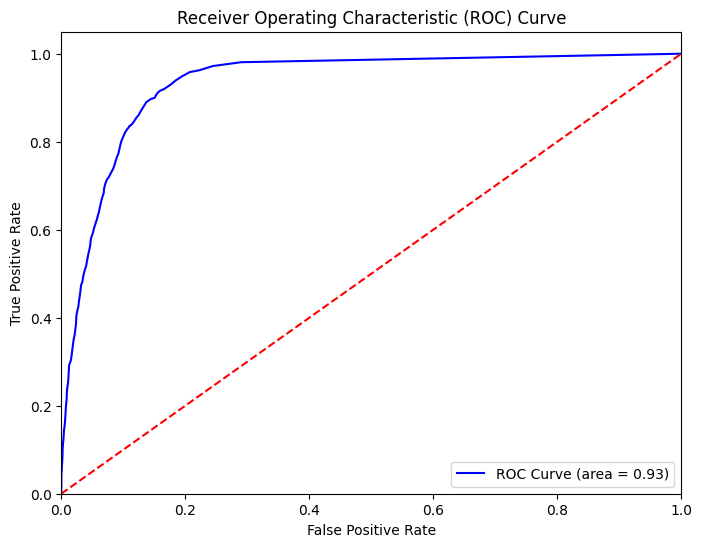

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set to get probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()